In [ ]:
#Import the necessary Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [ ]:
#Import the dataset and split into training and testing
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Length of training dataset
len(X_train)

60000

In [ ]:
#Length of testing dataset
len(X_test)

10000

In [ ]:
#Shape of first training image
X_train[0].shape

(28, 28)

In [ ]:
#Pixel value of image in 2d array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

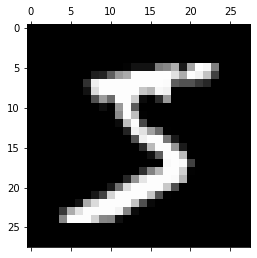

In [ ]:
#Plot the pixel values of first image in matplotlib 
plt.matshow(X_train[0],cmap='gray')

In [ ]:
#View the label of the image
y_train[0]

5

In [ ]:
#Normalize the values into 0 to 1
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [ ]:
#Pixel values after normalizing
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train=np.array(X_train).reshape(-1,28,28,1)
X_test=np.array(X_test).reshape(-1,28,28,1)

In [ ]:
#Building the model with artificial neural network layer
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(100, input_shape=(784,1), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3381 - accuracy: 0.9061
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1586 - accuracy: 0.9539
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1091 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0833 - accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9801


In [ ]:
#Model evaluation
ann_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9709


[0.0937575176358223, 0.9708999991416931]

Text(69.0, 0.5, 'Truth')

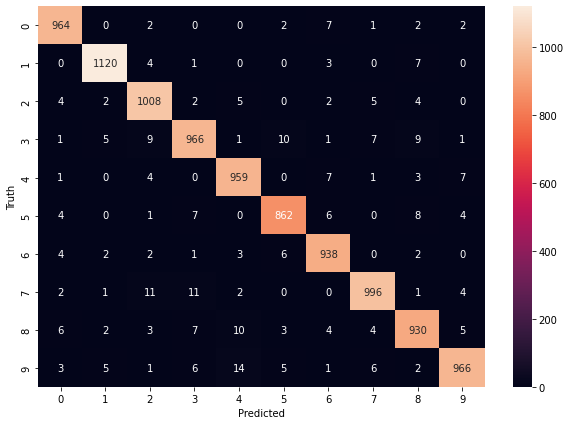

In [ ]:
#Prediction and confusion matrix for ANN model
y_predicted_ann = ann_model.predict(X_test)
y_predicted_labels_ann = [np.argmax(i) for i in y_predicted_ann]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_ann)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#TESTING

Predicted: 1


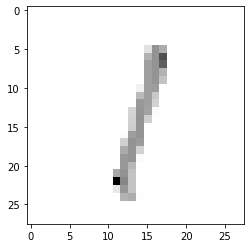

In [ ]:
#For Prediction using ANN
y_predicted_ann[57]

plt.imshow(np.squeeze(X_test[57]),cmap='gray_r')
print("Predicted:",np.argmax(y_predicted_ann[57]))


In [ ]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]), 
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2756 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0853 - accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0611 - accuracy: 0.9807
Epoch 4/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0485 - accuracy: 0.9846
Epoch 5/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0391 - accuracy: 0.9878


In [ ]:
#Model evaluation
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0516 - accuracy: 0.9847


[0.051639508455991745, 0.9847000241279602]

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)        

Text(69.0, 0.5, 'Truth')

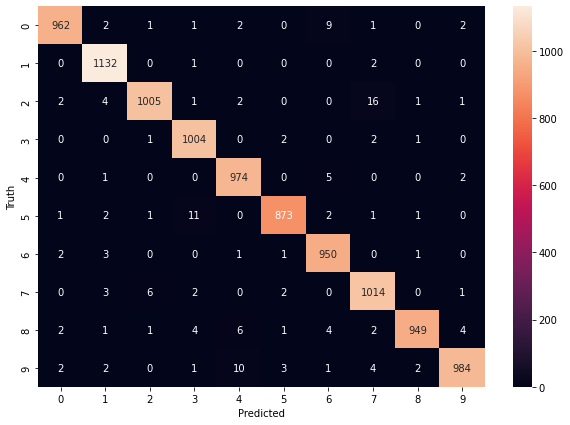

In [ ]:
#Prediction and confusion matrix for CNN model
y_predicted_cnn = cnn_model.predict(X_test)
y_predicted_labels_cnn = [np.argmax(i) for i in y_predicted_cnn]
cm_1 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_cnn)

plt.figure(figsize = (10,7))
sns.heatmap(cm_1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_predicted_cnn[517]

array([1.8097693e-05, 2.4401254e-07, 3.6462276e-07, 3.0093748e-08,
       2.3980487e-05, 6.3520151e-06, 9.9994874e-01, 5.0688767e-12,
       1.4944928e-06, 6.9291434e-07], dtype=float32)

Predicted: 6


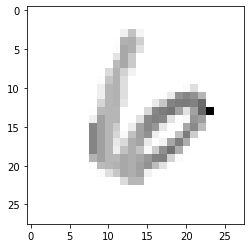

In [ ]:
#Prediction for CNN
y_predicted_cnn[517]

plt.imshow(np.squeeze(X_test[517]),cmap='gray_r')
print("Predicted:",np.argmax(y_predicted_cnn[517]))


In [ ]:
#RECURRENT NEURAL NETWORK

In [ ]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding,Flatten

rnn_model = Sequential()
rnn_model.add(LSTM(128, input_shape=(28,28), activation='relu', return_sequences=True))
rnn_model.add(Dropout(0.2))

rnn_model.add(LSTM(128, activation='relu'))
rnn_model.add(Dropout(0.1))

Flatten()
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dropout(0.2))


rnn_model.add(Dense(10, activation='softmax'))



In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

rnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

rnn_model.fit(X_train,
          y_train,
          epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 127s 67ms/step - loss: 0.7073 - accuracy: 0.7661
Epoch 2/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.1745 - accuracy: 0.9522
Epoch 3/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1152 - accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0894 - accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0758 - accuracy: 0.9791


In [ ]:
#Model evaluation
rnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0566 - accuracy: 0.9826


[0.056637153029441833, 0.9825999736785889]

Text(69.0, 0.5, 'Truth')

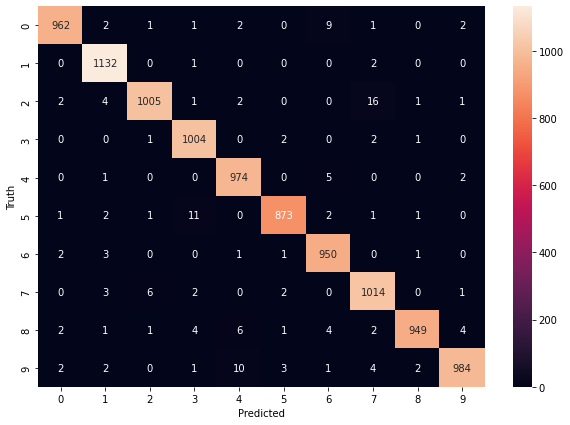

In [ ]:
#Prediction and confusion matrix for RNN model
y_predicted_rnn = rnn_model.predict(X_test)
y_predicted_labels_rnn = [np.argmax(i) for i in y_predicted_cnn]
cm_1 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_rnn)

plt.figure(figsize = (10,7))
sns.heatmap(cm_1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Predicted: 6


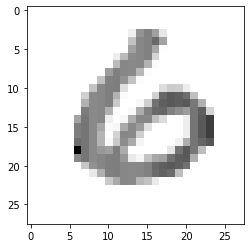

In [ ]:
#Prediction for RNN
y_predicted_rnn[5117]

plt.imshow(np.squeeze(X_test[5117]),cmap='gray_r')
print("Predicted:",np.argmax(y_predicted_rnn[5117]))


In [ ]:
#Comparing the three models
a,ann_acc=ann_model.evaluate(X_test,y_test)

b,cnn_acc=cnn_model.evaluate(X_test,y_test)

c,rnn_acc=rnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.0566 - accuracy: 0.9826


In [ ]:
cnn_model.save("model.h5")

None


TypeError: ignored

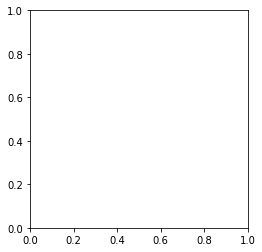

In [ ]:
#Test
import cv2

img=cv2.imread('/content/drive/MyDrive/Untitled.png')


print(img)
plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray

In [ ]:
input_image=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
print(input_image.shape)
print(input_image)


In [ ]:
plt.imshow(input_image,cmap='gray_r')

In [ ]:
l_image=tf.keras.utils.normalize(input_image,axis=1)

final_image=np.array(l_image).reshape(-1,28,28,1)

print(final_image)
plt.imshow(np.squeeze(final_image),cmap='gray_r')

In [ ]:
mypred=cnn_model.predict(final_image)
print(mypred)
print(np.argmax(mypred))